# Ponderada Pose Estimation

# Instalação do Mediapipe e Preparação dos Dados

Nesta primeira etapa do notebook, necessitou-se fazer a instalação do mediapipe e o downgrade do protobuf devido a incompatibilidades que a versão mais nova possui.

In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [77]:
!pip uninstall python3-protobuf -y

In [78]:
!pip uninstall protobuf -y

Found existing installation: protobuf 5.28.2
Uninstalling protobuf-5.28.2:
  Successfully uninstalled protobuf-5.28.2


In [1]:
pip install protobuf==3.20.*

Aqui estamos descompactando um arquivo ZIP do Google Drive e extraindo imagens JPEG para o diretório um diretório dentro do ambiente atual.

In [ ]:
!unzip /content/drive/MyDrive/Módulo\ 9/Semana7/Ponderada_programação_semana7/animal_pose_estimation.zip

Archive:  /content/drive/MyDrive/Módulo 9/Semana7/Ponderada_programação_semana7/animal_pose_estimation.zip
  inflating: images/images/2007_000063.jpg  
  inflating: images/images/2007_000175.jpg  
  inflating: images/images/2007_000332.jpg  
  inflating: images/images/2007_000392.jpg  
  inflating: images/images/2007_000464.jpg  
  inflating: images/images/2007_000491.jpg  
  inflating: images/images/2007_000504.jpg  
  inflating: images/images/2007_000528.jpg  
  inflating: images/images/2007_000549.jpg  
  inflating: images/images/2007_000676.jpg  
  inflating: images/images/2007_000720.jpg  
  inflating: images/images/2007_000783.jpg  
  inflating: images/images/2007_000799.jpg  
  inflating: images/images/2007_000836.jpg  
  inflating: images/images/2007_000876.jpg  
  inflating: images/images/2007_000904.jpg  
  inflating: images/images/2007_000925.jpg  
  inflating: images/images/2007_001073.jpg  
  inflating: images/images/2007_001185.jpg  
  inflating: images/images/2007_001

Nesta célula, estou carregando um arquivo JSON contendo anotações de keypoints, filtra as imagens da categoria "boi" (com category_id 5), obtém os nomes dos arquivos de imagem correspondentes, e copia essas imagens de um diretório de origem para um novo diretório chamado filtered_boi_images

In [4]:
import json
import shutil
import os
import matplotlib.pyplot as plt
import json
import pandas as pd
from PIL import Image

with open('/content/keypoints.json', 'r') as file:
    data = json.load(file)

boi_images = [item['image_id'] for item in data['annotations'] if item['category_id'] == 5]

boi_image_names = [data['images'][str(image_id)] for image_id in boi_images]

filtered_images_dir = '/content/filtered_boi_images'
os.makedirs(filtered_images_dir, exist_ok=True)

source_images_dir = '/content/images/images'

for image_name in boi_image_names:
    source_image_path = os.path.join(source_images_dir, image_name)
    dest_image_path = os.path.join(filtered_images_dir, image_name)
    if os.path.exists(source_image_path):
        shutil.copy(source_image_path, dest_image_path)

boi_image_names

['2007_000464.jpg',
 '2007_000464.jpg',
 '2007_000491.jpg',
 '2007_000504.jpg',
 '2007_000904.jpg',
 '2007_001073.jpg',
 '2007_001073.jpg',
 '2007_001073.jpg',
 '2007_001073.jpg',
 '2007_001073.jpg',
 '2007_001073.jpg',
 '2007_001299.jpg',
 '2007_001299.jpg',
 '2007_001299.jpg',
 '2007_001764.jpg',
 '2007_001764.jpg',
 '2007_001764.jpg',
 '2007_001764.jpg',
 '2007_001917.jpg',
 '2007_001917.jpg',
 '2007_001917.jpg',
 '2007_002387.jpg',
 '2007_004081.jpg',
 '2007_002088.jpg',
 '2007_002669.jpg',
 '2007_002669.jpg',
 '2007_002789.jpg',
 '2007_002903.jpg',
 '2007_003201.jpg',
 '2007_003201.jpg',
 '2007_003201.jpg',
 '2007_003841.jpg',
 '2007_004500.jpg',
 '2007_004500.jpg',
 '2007_004537.jpg',
 '2007_004537.jpg',
 '2007_004537.jpg',
 '2007_004537.jpg',
 '2008_000711.jpg',
 '2008_000711.jpg',
 '2008_000711.jpg',
 '2008_000711.jpg',
 '2007_005114.jpg',
 '2007_005114.jpg',
 '2007_005124.jpg',
 '2007_005547.jpg',
 '2007_005797.jpg',
 '2007_006761.jpg',
 '2007_006841.jpg',
 '2008_002278.jpg',


Aqui, carrego um arquivo JSON contendo anotações de keypoints, percorro todas as anotações e extrai as informações relevantes, como image_id, category_id, bbox (bounding box), keypoints e o número de keypoints. Além disso, obtém o nome da imagem associada a cada image_id. Essas informações são organizadas em uma lista de dicionários, e depois a lista é convertida em um DataFrame do Pandas.

In [5]:

with open('/content/keypoints.json', 'r') as file:
    data = json.load(file)

data_list = []
for annotation in data['annotations']:
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    bbox = annotation['bbox']
    keypoints = annotation['keypoints']
    num_keypoints = annotation['num_keypoints']
    image_name = data['images'][str(image_id)]

    data_list.append({
        'image_id': image_id,
        'image_name': image_name,
        'category_id': category_id,
        'bbox': bbox,
        'keypoints': keypoints,
        'num_keypoints': num_keypoints
    })


df = pd.DataFrame(data_list)

## Exploração do Dataset

In [6]:
df

,image_id,image_name,category_id,bbox,keypoints,num_keypoints
0,1,2007_000063.jpg,1,"[123, 115, 379, 275]","[[193, 216, 1], [160, 217, 1], [174, 261, 1], ...",20
1,2,2007_000175.jpg,3,"[25, 34, 419, 271]","[[330, 84, 1], [245, 91, 1], [290, 137, 1], [3...",20
2,3,2007_000332.jpg,4,"[54, 50, 285, 262]","[[275, 102, 1], [247, 105, 1], [269, 156, 1], ...",20
3,4,2007_000392.jpg,4,"[100, 96, 355, 324]","[[0, 0, 0], [327, 161, 1], [350, 192, 1], [333...",20
4,5,2007_000464.jpg,5,"[71, 252, 216, 314]","[[103, 269, 1], [86, 269, 1], [92, 284, 1], [1...",20
...,...,...,...,...,...,...
6112,4604,sh95.jpg,3,"[33, 63, 547, 559]","[[119, 140, 1], [0, 0, 0], [48, 183, 1], [158,...",20
6113,4605,sh96.jpg,3,"[119, 50, 729, 594]","[[656, 113, 1], [0, 0, 0], [580, 181, 1], [683...",20
6114,4606,sh97.jpg,3,"[105, 38, 565, 598]","[[250, 91, 1], [166, 91, 1], [214, 148, 1], [2...",20
6115,4607,sh98.jpeg,3,"[65, 54, 263, 202]","[[245, 93, 1], [210, 94, 1], [232, 115, 1], [2...",20


Aqui faço um filtro apenas para visualizar as linhas com os nomes das imagens que contém bois **category_id = 5**.

In [7]:
df.loc[df['category_id'] == 5]

,image_id,image_name,category_id,bbox,keypoints,num_keypoints
4,5,2007_000464.jpg,5,"[71, 252, 216, 314]","[[103, 269, 1], [86, 269, 1], [92, 284, 1], [1...",20
5,5,2007_000464.jpg,5,"[58, 202, 241, 295]","[[73, 225, 1], [0, 0, 0], [64, 240, 1], [84, 2...",20
6,6,2007_000491.jpg,5,"[2, 2, 459, 334]","[[0, 0, 0], [255, 46, 1], [308, 88, 1], [171, ...",20
7,7,2007_000504.jpg,5,"[341, 102, 500, 406]","[[363, 125, 1], [0, 0, 0], [343, 147, 1], [385...",20
17,16,2007_000904.jpg,5,"[237, 167, 338, 263]","[[248, 205, 1], [0, 0, 0], [238, 222, 1], [254...",20
...,...,...,...,...,...,...
5512,4004,co95.jpeg,5,"[77, 48, 267, 206]","[[103, 68, 1], [83, 68, 1], [89, 91, 1], [110,...",20
5513,4005,co96.jpeg,5,"[1, 9, 291, 275]","[[57, 75, 1], [0, 0, 0], [26, 118, 1], [85, 61...",20
5514,4006,co97.jpeg,5,"[43, 6, 243, 196]","[[203, 37, 1], [0, 0, 0], [182, 64, 1], [235, ...",20
5515,4007,co98.jpeg,5,"[17, 16, 273, 176]","[[47, 42, 1], [0, 0, 0], [25, 59, 1], [67, 37,...",20


Esta célula calcula a quantidade de imagens de vacas (com category_id igual a 5) e a quantidade de outros animais (com category_id diferente de 5) no DataFrame. Em seguida, utiliza esses valores para gerar um gráfico de pizza que mostra a proporção de vacas em relação a outros animais no dataset.

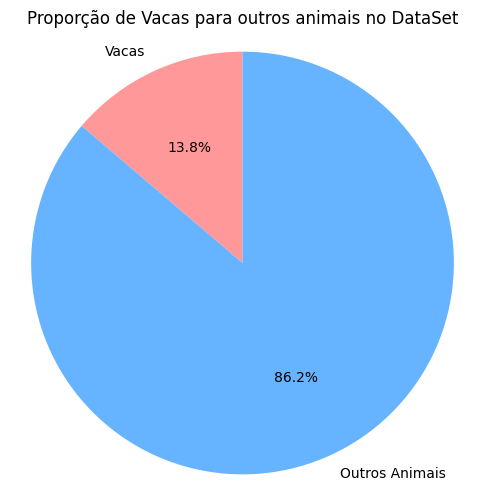

In [8]:
count_vacas= df.loc[df['category_id'] == 5].shape[0]
count_no_vacas= df.loc[df['category_id'] != 5].shape[0]

labels = ['Vacas', 'Outros Animais']
sizes = [count_vacas, count_no_vacas]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proporção de Vacas para outros animais no DataSet')
plt.axis('equal')
plt.show()

Esta célula mostra os valores únicos de categoria de animais no Dataframe.

In [9]:
unique_image_ids = df['category_id'].unique()
print(unique_image_ids)

[1 3 4 5 2]


Aqui, conto o número de imagens em cada categoria de animais (category_id de 1 a 5), correspondendo a cachorro, gato, ovelha, cavalo e vaca. Em seguida, utiliza esses valores para gerar um gráfico de pizza que mostra a proporção de cada animal no dataset, com percentuais e diferentes cores atribuídas a cada categoria

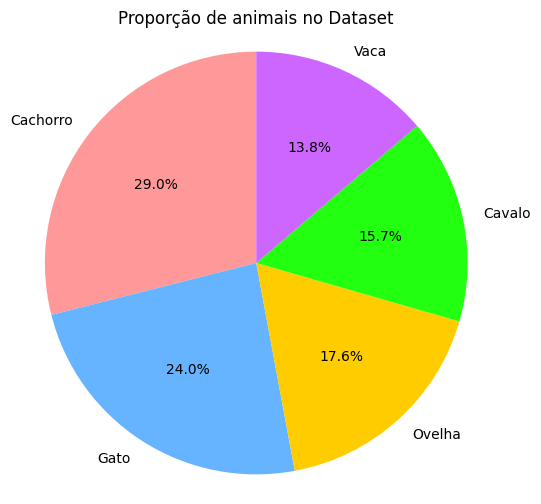

In [71]:
df_category_1= df.loc[df['category_id'] == 1].shape[0]
df_category_2= df.loc[df['category_id'] == 2].shape[0]
df_category_3= df.loc[df['category_id'] == 3].shape[0]
df_category_4= df.loc[df['category_id'] == 4].shape[0]
df_category_5= df.loc[df['category_id'] == 5].shape[0]


labels = ['Cachorro', 'Gato', 'Ovelha', 'Cavalo', 'Vaca']
sizes = [df_category_1, df_category_2, df_category_3, df_category_4, df_category_5]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = ['#ff9999', '#66b3ff', '#ffcc00', '#22ff11', '#cc66ff'])
plt.title('Proporção de animais no Dataset')
plt.axis('equal')
plt.show()

In [11]:
df_vacas = df.loc[df['category_id'] == 5]

vaca_counts = df_vacas.groupby('image_id').size()
print(vaca_counts)

image_id
5       2
6       1
7       1
16      1
18      6
       ..
4004    1
4005    1
4006    1
4007    1
4008    1
Length: 534, dtype: int64


Esta célula filtra o DataFrame para obter apenas as imagens que contêm vacas (category_id igual a 5), e em seguida agrupa essas imagens por image_id para contar quantas vezes cada imagem de vaca aparece no dataset.

In [12]:
one_cow_images= vaca_counts[vaca_counts == 1]
no_one_cow_images= vaca_counts[vaca_counts != 1]
print(f"Número de imagens com apenas uma vaca: {one_cow_images.shape[0]}")

Número de imagens com apenas uma vaca: 378


Abaixo gero um gráfico de barras que compara a quantidade de imagens contendo apenas uma vaca (one_cow_count) com aquelas que contêm mais de uma vaca (more_than_one_cow_count).

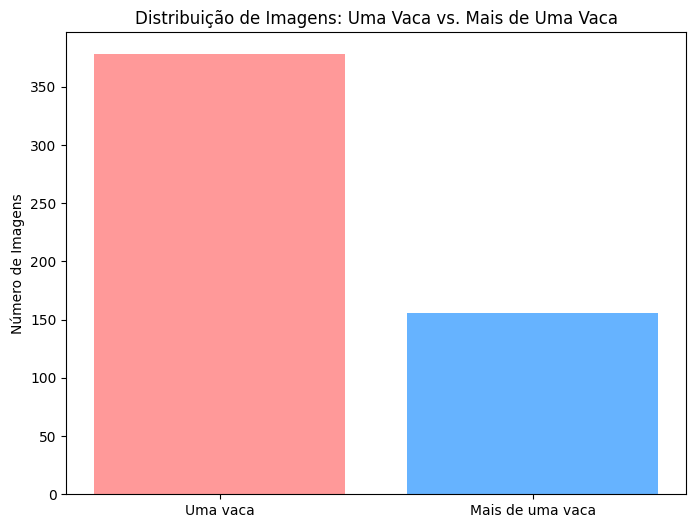

In [13]:
import matplotlib.pyplot as plt

# Quantidades
one_cow_count = one_cow_images.shape[0]
more_than_one_cow_count = no_one_cow_images.shape[0]

# Dados para o gráfico
labels = ['Uma vaca', 'Mais de uma vaca']
counts = [one_cow_count, more_than_one_cow_count]

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['#ff9999','#66b3ff'])

# Adicionar rótulos e título
plt.ylabel('Número de Imagens')
plt.title('Distribuição de Imagens: Uma Vaca vs. Mais de Uma Vaca')

# Mostrar gráfico
plt.show()


Aqui estou criando um novo Dataframe apenas com as imagens que possuem uma vaca.

In [14]:
imagens_com_uma_vaca = vaca_counts[vaca_counts == 1].index
df_uma_vaca = df_vacas[df_vacas['image_id'].isin(imagens_com_uma_vaca)]


In [15]:
df_uma_vaca

,image_id,image_name,category_id,bbox,keypoints,num_keypoints
6,6,2007_000491.jpg,5,"[2, 2, 459, 334]","[[0, 0, 0], [255, 46, 1], [308, 88, 1], [171, ...",20
7,7,2007_000504.jpg,5,"[341, 102, 500, 406]","[[363, 125, 1], [0, 0, 0], [343, 147, 1], [385...",20
17,16,2007_000904.jpg,5,"[237, 167, 338, 263]","[[248, 205, 1], [0, 0, 0], [238, 222, 1], [254...",20
61,35,2007_002387.jpg,5,"[246, 170, 342, 244]","[[0, 0, 0], [331, 190, 1], [337, 202, 1], [0, ...",20
70,41,2007_004081.jpg,5,"[174, 96, 348, 209]","[[184, 144, 1], [0, 0, 0], [187, 162, 1], [185...",20
...,...,...,...,...,...,...
5512,4004,co95.jpeg,5,"[77, 48, 267, 206]","[[103, 68, 1], [83, 68, 1], [89, 91, 1], [110,...",20
5513,4005,co96.jpeg,5,"[1, 9, 291, 275]","[[57, 75, 1], [0, 0, 0], [26, 118, 1], [85, 61...",20
5514,4006,co97.jpeg,5,"[43, 6, 243, 196]","[[203, 37, 1], [0, 0, 0], [182, 64, 1], [235, ...",20
5515,4007,co98.jpeg,5,"[17, 16, 273, 176]","[[47, 42, 1], [0, 0, 0], [25, 59, 1], [67, 37,...",20


In [16]:
image_dir= '/content/images/images'

In [93]:
cow_pos= 97

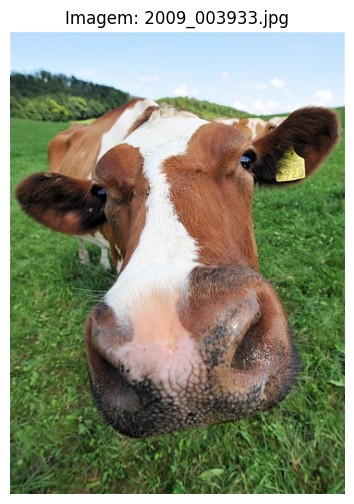

In [94]:
image_name = df_uma_vaca['image_name'].iloc[cow_pos]

image_path = os.path.join(image_dir, image_name)
image = Image.open(image_path)

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f"Imagem: {image_name}")
plt.axis('off')  #
plt.show()

Esta célula carrega uma imagem e, com base em um índice específico (cow_pos), obtém as coordenadas da bounding box e os keypoints de uma vaca. Em seguida, desenha a bounding box e os keypoints (se visíveis) sobre a imagem. Por fim, exibe a imagem anotada com título e sem os eixos, usando matplotlib.

<ipython-input-95-fc8a11442101>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bbox = row[3]
<ipython-input-95-fc8a11442101>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  keypoints = row[4]


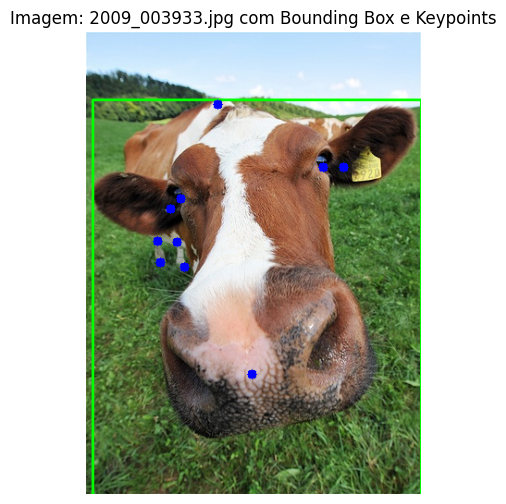

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_np= np.array(image)

image_with_annotations = np.array(image_np.copy())

row = df_uma_vaca.iloc[cow_pos]

bbox = row[3]
keypoints = row[4]


x, y, w, h = bbox
cv2.rectangle(image_with_annotations, (x, y), (x + w, y + h), (0, 255, 0), 2)

for kp in keypoints:
    if kp[2] > 0:
        cv2.circle(image_with_annotations, (kp[0], kp[1]), 5, (0, 0, 255), -1)


plt.figure(figsize=(6, 6))
plt.imshow(image_with_annotations)
plt.title(f"Imagem: {row['image_name']} com Bounding Box e Keypoints")
plt.axis('off')
plt.show()


Por fim, nesta célula estou utilizando a biblioteca MediaPipe para detectar keypoints de pose em uma imagem. Ela converte a imagem para RGB, processa usando o modelo de pose do MediaPipe, e desenha os keypoints detectados diretamente sobre a imagem. Em seguida, exibe a imagem original ao lado da imagem anotada (com keypoints) usando matplotlib.

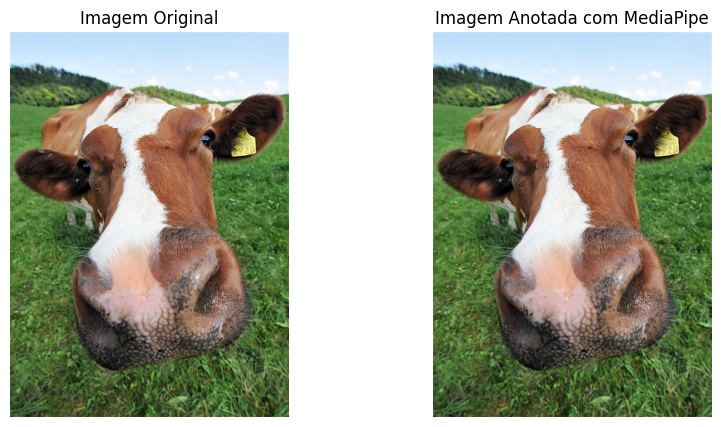

In [96]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

image = image
image_np = np.array(image)

def show_kp(image_np):
    image_with_annotations = np.array(image_np.copy())

    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image_with_annotations, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return image_with_annotations

image_with_annotations = show_kp(image_np)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_annotations)
plt.title('Imagem Anotada com MediaPipe')
plt.axis('off')

plt.show()